<a href="https://colab.research.google.com/github/maefl0wer/Statistics2022/blob/main/Bloom_FinalExamLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

Uploading all of the imports and installs we will need for the lab including numpy and plt which we have used before

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #defining the plot function
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #defining getting the slide presentation from the url link
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #defining getting the actual slides from the presentation
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): #defining loading/showing the images

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #will take an image and make a feature vector (like a barcode or fingerprint)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" #gives the link for the slides that have the images of our opposing images (cats and dogs)

In [ ]:
url = "https://docs.google.com/presentation/d/1njl_zRhcfGaJFEFM0hK5WzbN6CBupawn8g7dIZCrrok/edit#slide=id.g1a97f6ce6a9_0_162" #my personal data set link with bees and butterflies, will be used because it'll overwrite the url definition before it

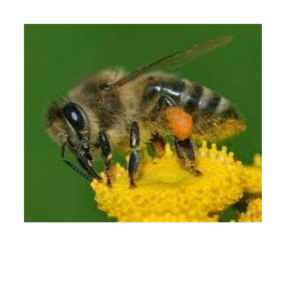

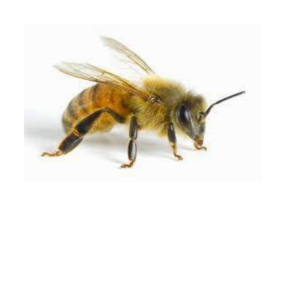

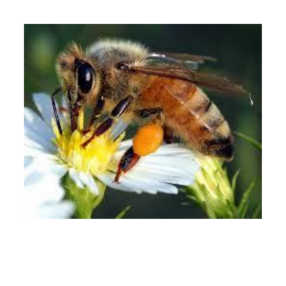

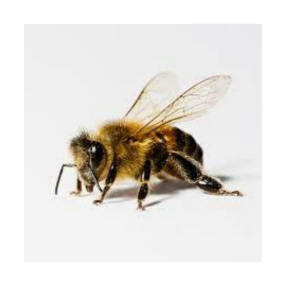

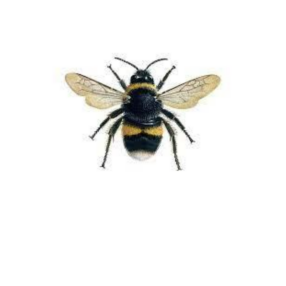

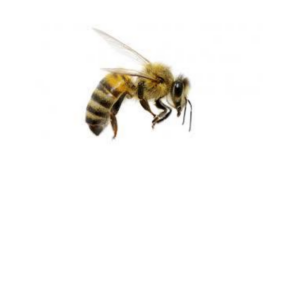

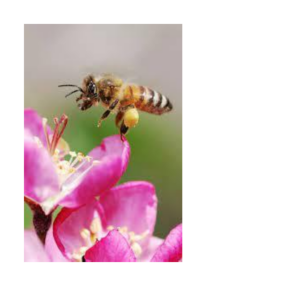

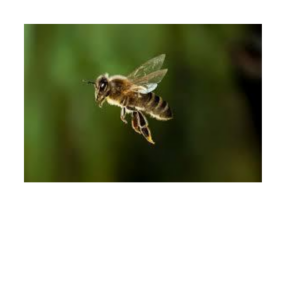

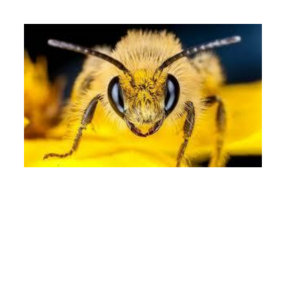

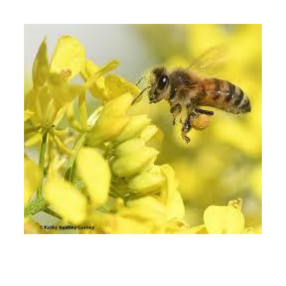

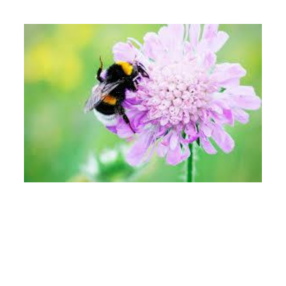

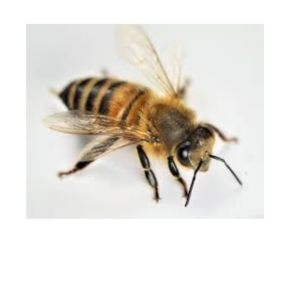

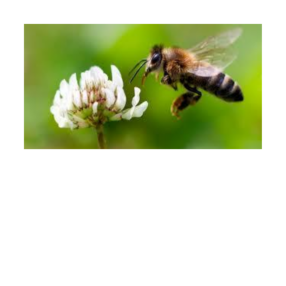

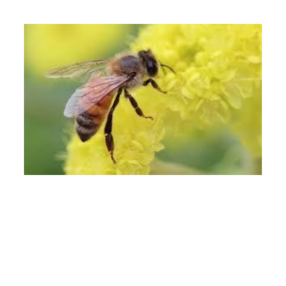

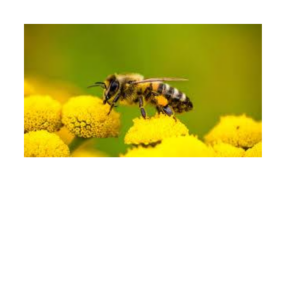

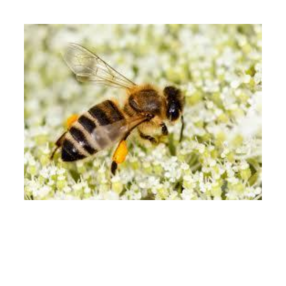

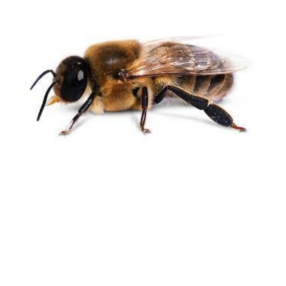

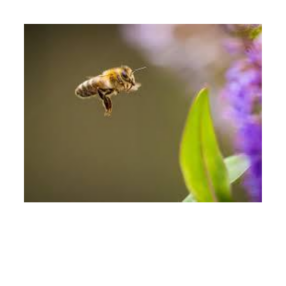

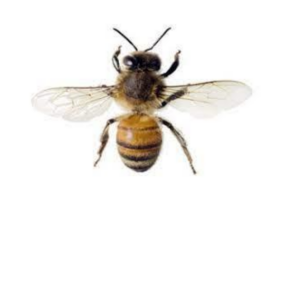

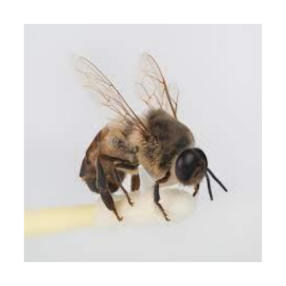

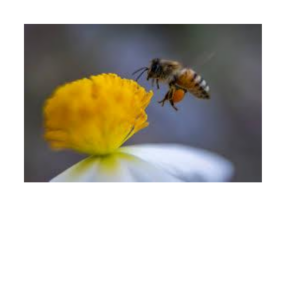

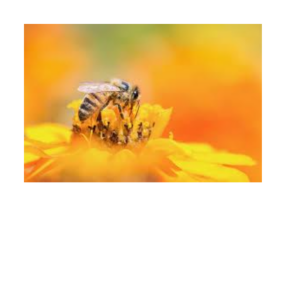

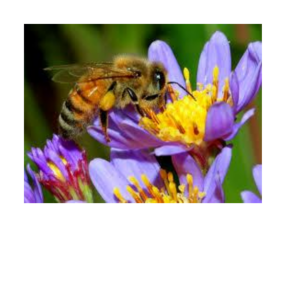

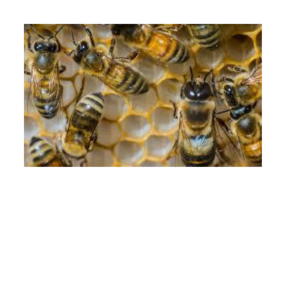

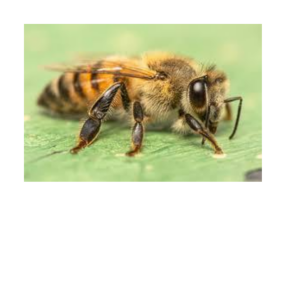

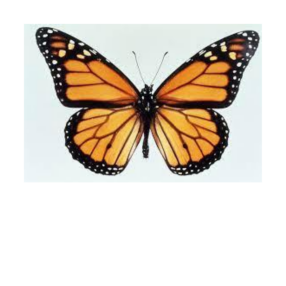

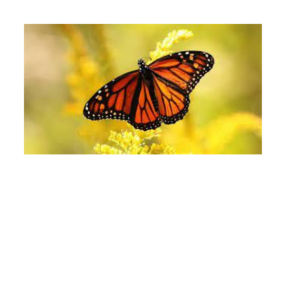

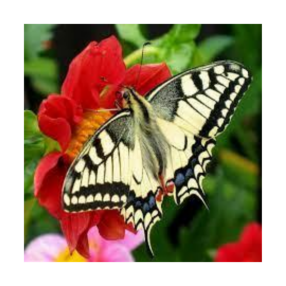

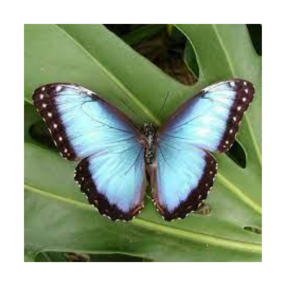

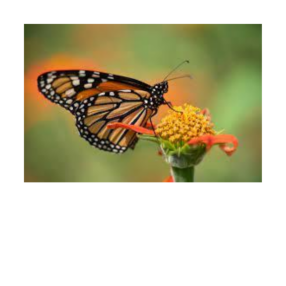

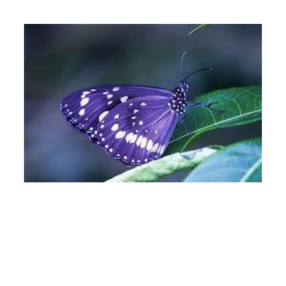

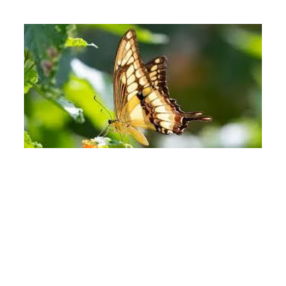

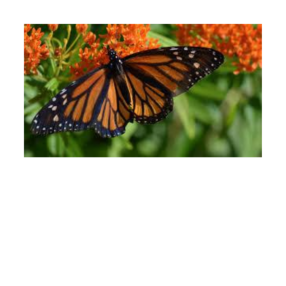

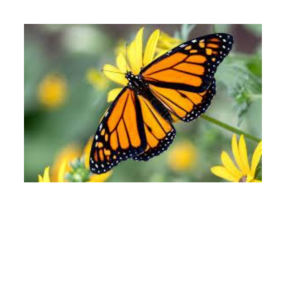

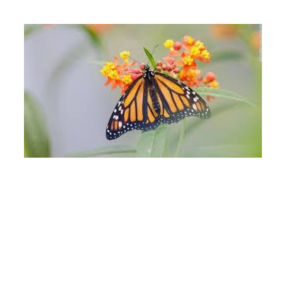

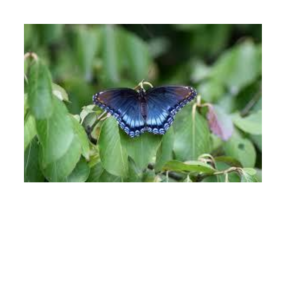

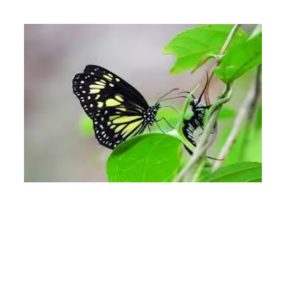

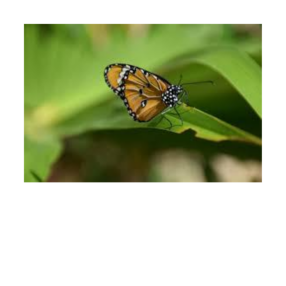

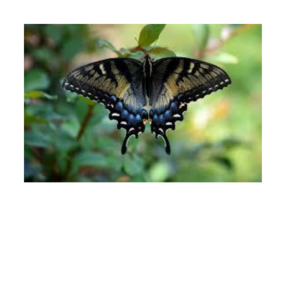

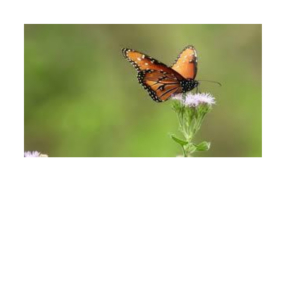

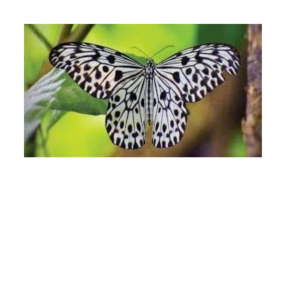

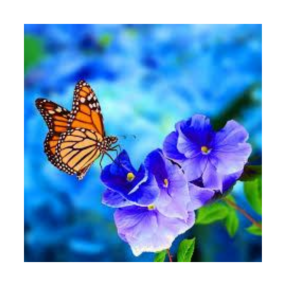

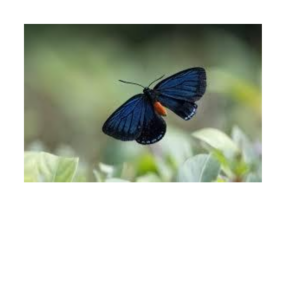

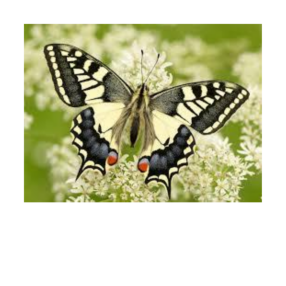

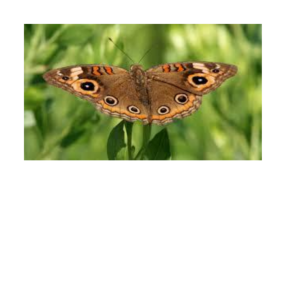

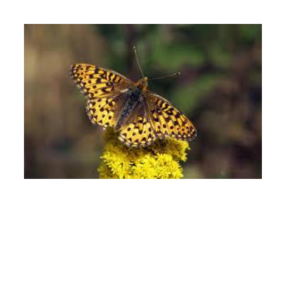

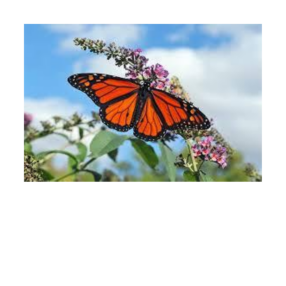

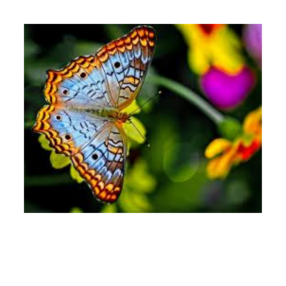

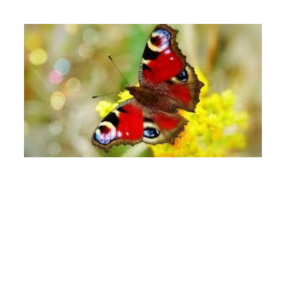

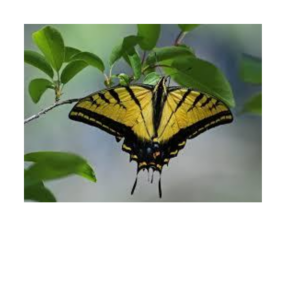

In [ ]:
images = []

for image in get_slides(url): #saying that for every image in the command "get_slides" from the url link, it will run the commands below it

    plot(image) #plo/show the image

    images.append(load(image)) #load the image onto the screen

images = torch.vstack(images) #creates a stack of images vertically 

The number of dimensions a tensor has is called its rank and the length in each dimension describes its shape . For example, a 2 by 3 matrix: 1 2 3 4 5 6. has a rank of 2 , a shape of [2, 3] and a length of 6.

In [ ]:
images.shape #asking the computer to give us the shapes of the images

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-2.3318,  1.9523, -3.7592,  ...,  0.4169,  6.0524, -2.4749],
        [ 1.7291,  3.1594, -4.0732,  ..., -0.8149,  4.7933,  0.5387],
        [-1.2027,  0.2433, -4.5059,  ...,  0.3367,  5.4965,  0.2690],
        ...,
        [-2.1205, -0.0732, -4.6458,  ..., -2.1241,  4.5330,  0.7570],
        [-3.2492, -0.9671, -5.7482,  ..., -3.8178, -0.1973,  1.1807],
        [-3.8679, -2.3551, -5.5986,  ..., -1.3329,  3.6726, -0.3101]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) #defining y as the model of the images

In [ ]:
y.shape #asking for the shape of the image models

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #maximum agrument accepts a tensor and returns the indices of the maximum values of the input tensor across a specified dimension/axis (in this case, y)

In [ ]:
for i in list(guesses): #saying that for each (i) in the list of pictures, it will run the "guesses" command (the maximum argument) and print the labels
    print(labels[i])

bee
bee
bee
bee
black widow, Latrodectus mactans
fly
hair slide
bee
web site, website, internet site, site
rapeseed
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
bee
tick
fly
ant, emmet, pismire
bee
bee
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
bee
fly
rapeseed
ant, emmet, pismire
screen, CRT screen
honeycomb
bee
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
comic book
lycaenid, lycaenid butterfly
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
hair slide
grasshopper, hopper
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
hair slide
fly
hair slide
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
long-horned beetle, longicorn, longicorn beetle
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
lycaenid, lycaenid butterfly
monarch, monarch butterfly, milkwe

In [ ]:
Y = np.zeros(50,) #defining Y as the zeros in the images, basically making an answer key
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #defining X and returning a new Tensor, detached from the current graph

In [ ]:
X.shape

(50, 1000)

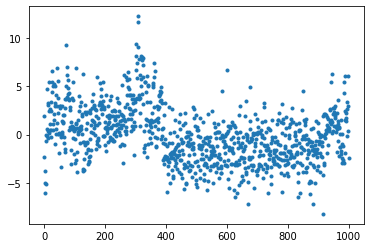

In [ ]:
plt.plot(X[0],'.') #plotting X and giving outputs for each of the categories

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] #will show the top 10 guesses for the images

In [ ]:
top_ten #prints out the top ten numbers for the guesses

array([309, 308, 303,  73, 307, 301, 318, 322, 326, 310])

In [ ]:
for i in top_ten : #for each of the top ten guesses --
    print(i, labels[i]) #it will print the labels/guesses it has plus the number it corresponds to

309 bee
308 fly
303 long-horned beetle, longicorn, longicorn beetle
73 barn spider, Araneus cavaticus
307 weevil
301 ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
318 lacewing, lacewing fly
322 ringlet, ringlet butterfly
326 lycaenid, lycaenid butterfly
310 ant, emmet, pismire


In [ ]:
labels #all of the things the computer has been trained to classify, see that 309 is "bee" meaning that it is the most likely guess for what the images are

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
X[0]

array([-2.3317561e+00,  1.9522992e+00, -3.7592099e+00, -4.9891582e+00,
       -6.0414877e+00, -4.9055215e-02, -5.1341147e+00, -7.0732915e-01,
       -1.6708508e-01,  5.4405582e-01,  4.7554083e+00,  3.3301358e+00,
        3.0243261e+00, -3.3013609e-01,  3.3757737e-01,  5.4949269e+00,
        2.4767785e+00,  1.2646773e-01,  4.5347324e-01,  2.7035649e+00,
        1.1274766e+00,  3.3398561e+00, -2.4251096e-01,  4.2869723e-01,
        2.4295280e+00,  5.5041456e+00,  6.5793343e+00,  4.4301248e+00,
        5.0629349e+00,  1.1166044e+00,  4.4732878e-01,  2.1115370e+00,
        5.3060584e+00,  1.5307140e+00, -9.7327226e-01,  3.0101252e+00,
        5.0968604e+00,  3.3240032e+00,  4.1160970e+00,  5.8443165e-01,
        4.1586205e-02,  3.0218258e+00,  1.2526553e+00,  6.8690524e+00,
        3.8479772e+00,  2.2641044e+00,  5.9645053e-02,  5.5718455e+00,
       -1.9454241e+00,  2.0690235e-01,  9.1171838e-02,  2.9818389e+00,
        2.9260743e+00,  2.7652156e+00,  5.7666823e-02, -3.3320456e+00,
      

In [ ]:
np.argmax(X[0]) #this is the maximum spot in the data set/graph

309

In [ ]:
labels[309] #prints what the label of 309 is, which is the computers best guess for the image. which is correct

'bee'

(array([  6.,  48., 196., 270., 258., 136.,  59.,  20.,   5.,   2.]),
 array([-8.241626  , -6.18758   , -4.133535  , -2.0794892 , -0.02544384,
         2.0286016 ,  4.0826473 ,  6.1366925 ,  8.190738  , 10.244783  ,
        12.298829  ], dtype=float32),
 <a list of 10 Patch objects>)

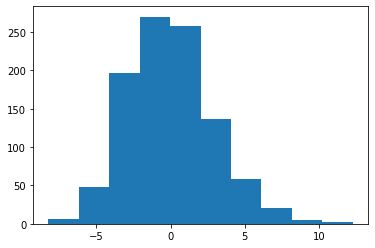

In [ ]:
plt.hist(X[0]) #plotting a histogram graph 

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

GPU_data allows to update the data in one operation and transforms it into a regular numpy array

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-38-0cf876354474>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


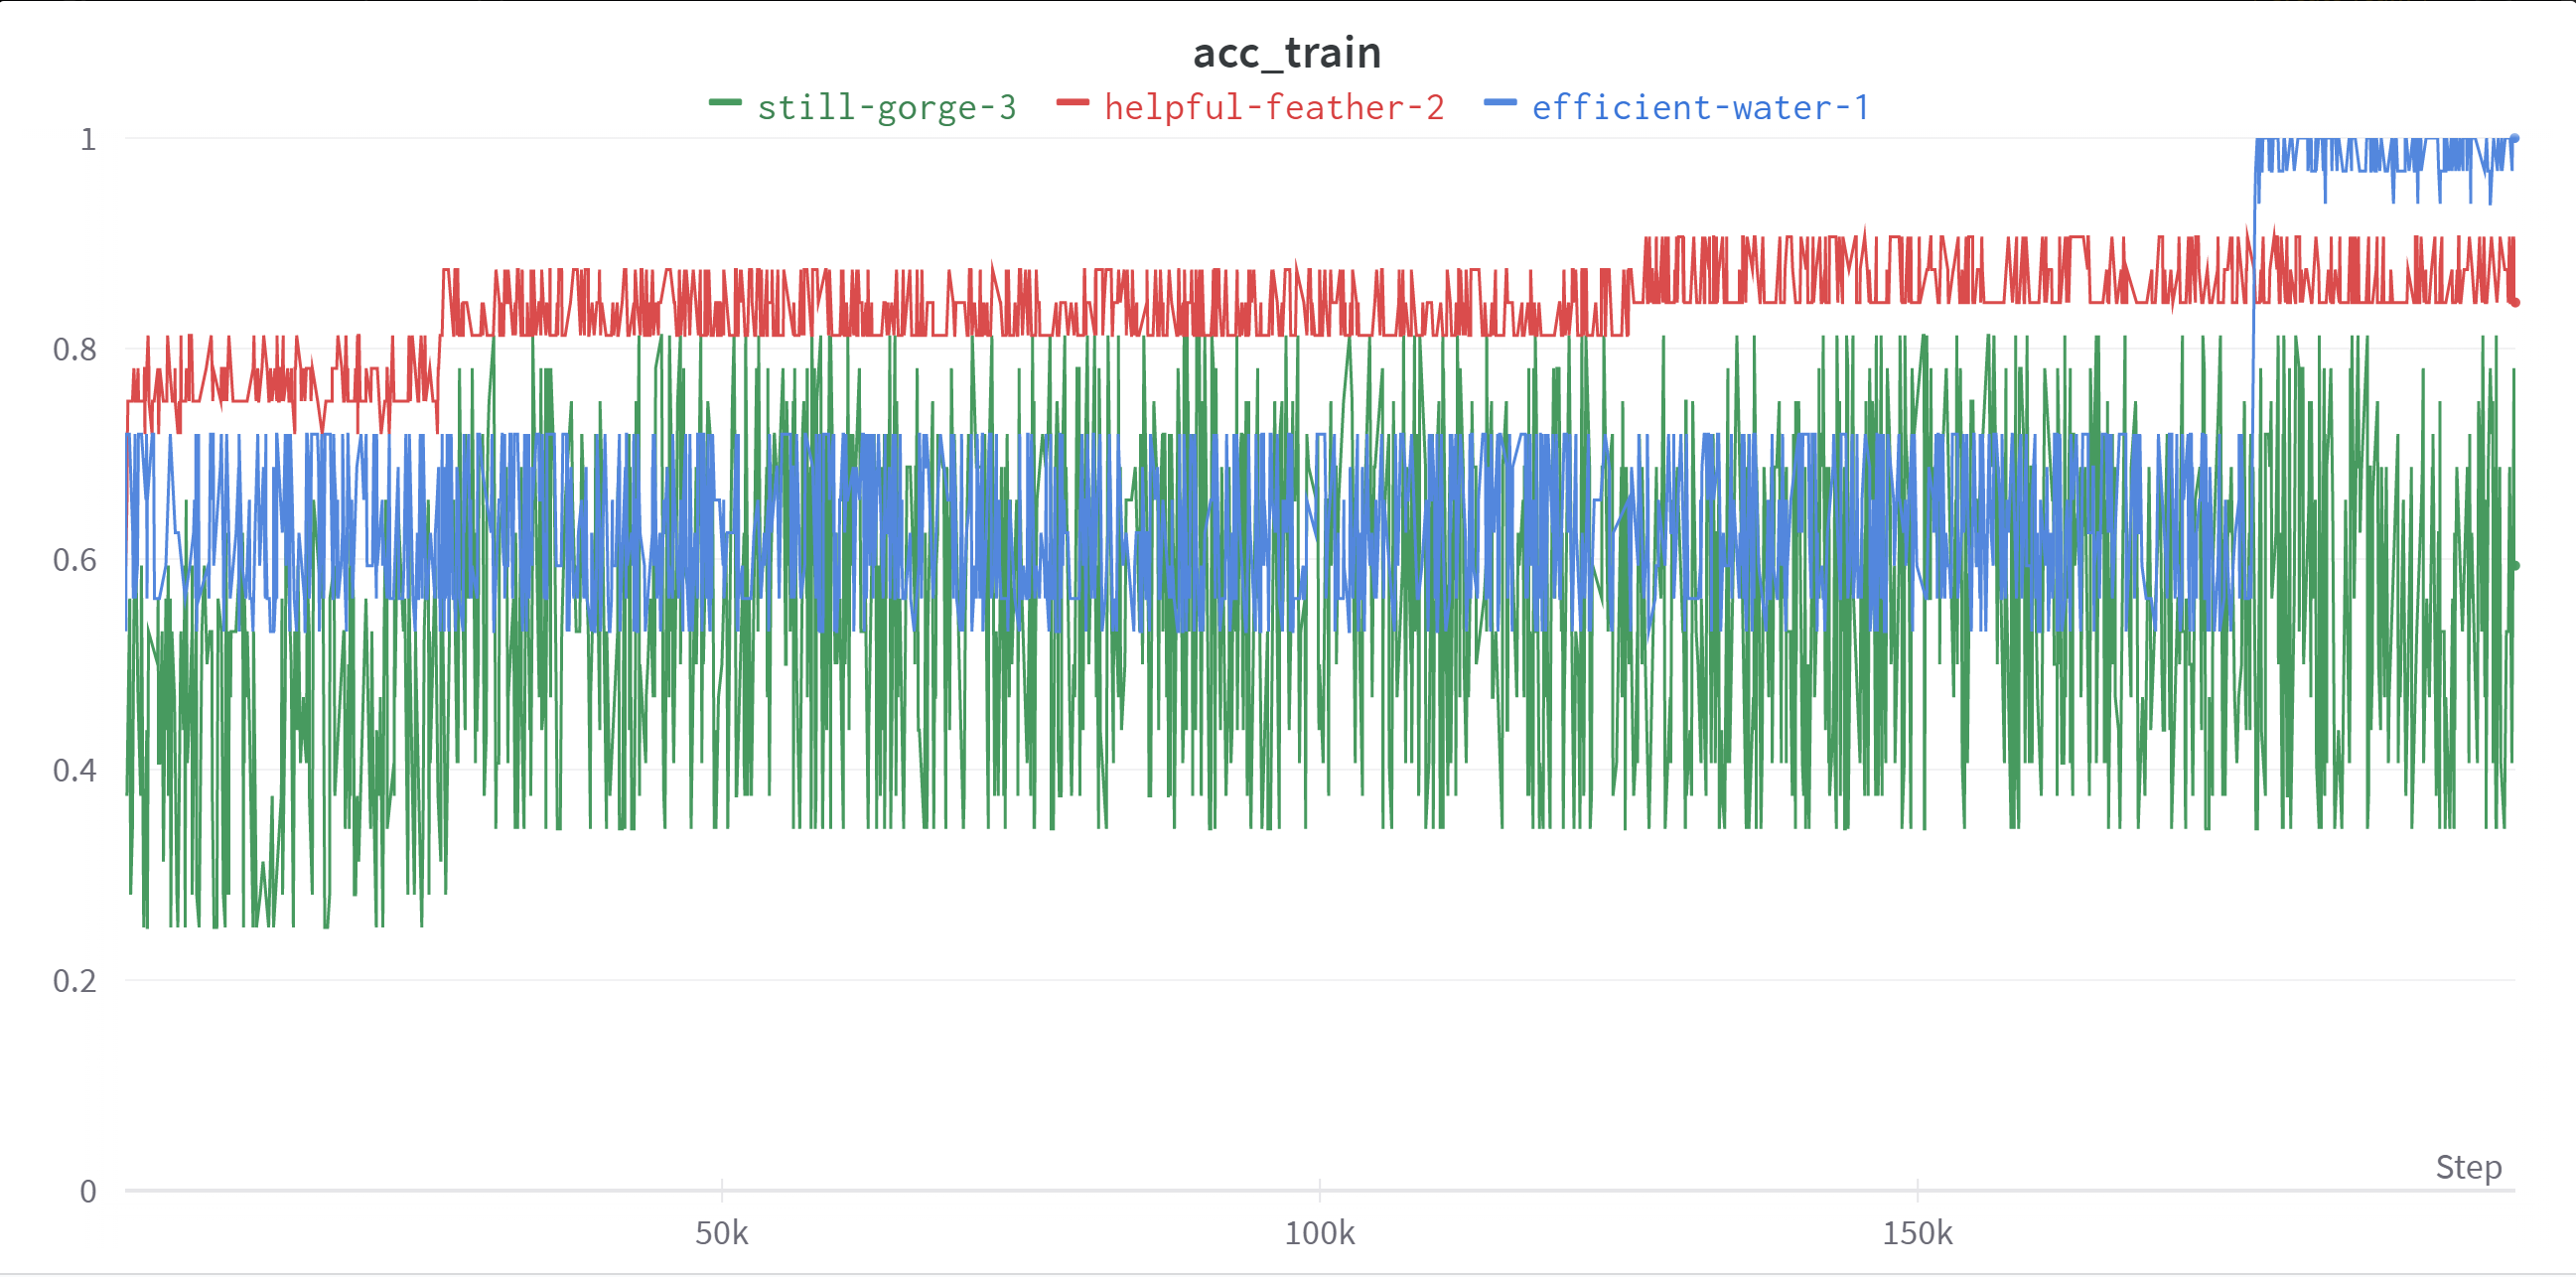